<a href="https://colab.research.google.com/github/VarshaChanumolu/ASL-Alphabet-Classification-using-Deep-Learning/blob/main/ASL%20Classification%20-%20VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/My Drive/Project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1hH_N2iqbtX4YiWIB8ct443lkUIuqPFqX/Project


In [ ]:
trainDir = "./asl-alphabet/asl_alphabet_train/asl_alphabet_train/"
testDir = "./asl-alphabet/Asl_Alphabet_Test/"

In [ ]:
uniq_labels = sorted(os.listdir(trainDir))

In [ ]:
def load_data(trainDir,uniqueLabels, size):
    images = []
    labels = []
    #size = 32,32
    for idx, label in enumerate(uniqueLabels):
        for file in os.listdir(trainDir  +"/" + label):
          filepath = trainDir + "/" + label + "/" + file
          image = cv2.resize(cv2.imread(filepath), size)
          images.append(image)
          labels.append(idx)
        print(label)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
images, labels = load_data(trainDir,uniq_labels, (48,48))

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
del
space


In [ ]:
X_test, y_test = load_data(testDir,uniq_labels,(48,48))

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
del
space


In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(images, labels, test_size = 0.3, stratify = labels)

In [ ]:
train_n = len(X_train)
test_n = len(X_test)
eval_n = len(X_eval)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)


print("Number of evaluation images: ", eval_n)

Number of training images:  58821
Number of testing images:  252
Number of evaluation images:  25209


In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)
y_eval = tensorflow.keras.utils.to_categorical(y_eval)
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [ ]:
def results(model,history, x_test, y_test):
  #rmsProp = tensorflow.keras.optimizers.RMSprop()

  #model.compile(optimizer=rmsProp, loss='categorical_crossentropy', metrics=['accuracy'])

  #history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
  

  #model.summary()

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  test_loss, test_acc = model.evaluate( x_test, y_test)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)

In [ ]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16


In [ ]:
vggmodel = VGG16(weights='imagenet', include_top=False, input_shape=(48,48,3))
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
model=Sequential()
model.add(vggmodel)
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(28, activation="softmax"))

In [ ]:
adamOpti = Adam(learning_rate = 0.0001)
model.compile(optimizer=adamOpti, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data = (X_eval, y_eval))

Epoch 1/10
920/920 [==============================] - 191s 195ms/step - loss: 2.6169 - accuracy: 0.2480 - val_loss: 2.0439 - val_accuracy: 0.4166
Epoch 2/10
920/920 [==============================] - 176s 191ms/step - loss: 1.8926 - accuracy: 0.4311 - val_loss: 1.6428 - val_accuracy: 0.4611
Epoch 3/10
920/920 [==============================] - 177s 192ms/step - loss: 1.6058 - accuracy: 0.4597 - val_loss: 1.5280 - val_accuracy: 0.4643
Epoch 4/10
920/920 [==============================] - 176s 192ms/step - loss: 1.2631 - accuracy: 0.5514 - val_loss: 0.9273 - val_accuracy: 0.6520
Epoch 5/10
920/920 [==============================] - 176s 192ms/step - loss: 0.8780 - accuracy: 0.6730 - val_loss: 0.7899 - val_accuracy: 0.7013
Epoch 6/10
920/920 [==============================] - 176s 192ms/step - loss: 0.7687 - accuracy: 0.7051 - val_loss: 0.7309 - val_accuracy: 0.7107
Epoch 7/10
920/920 [==============================] - 176s 192ms/step - loss: 0.6775 - accuracy: 0.7330 - val_loss: 0.5487 -

8/8 [==============================] - 2s 129ms/step - loss: 8.0507 - accuracy: 0.0913
Test accuracy: 0.0912698432803154
Test loss: 8.050654411315918


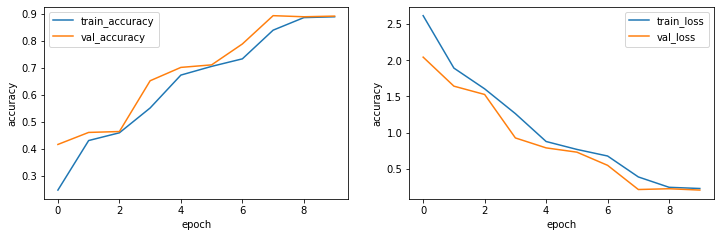

In [ ]:
results(model,history, X_test, y_test)

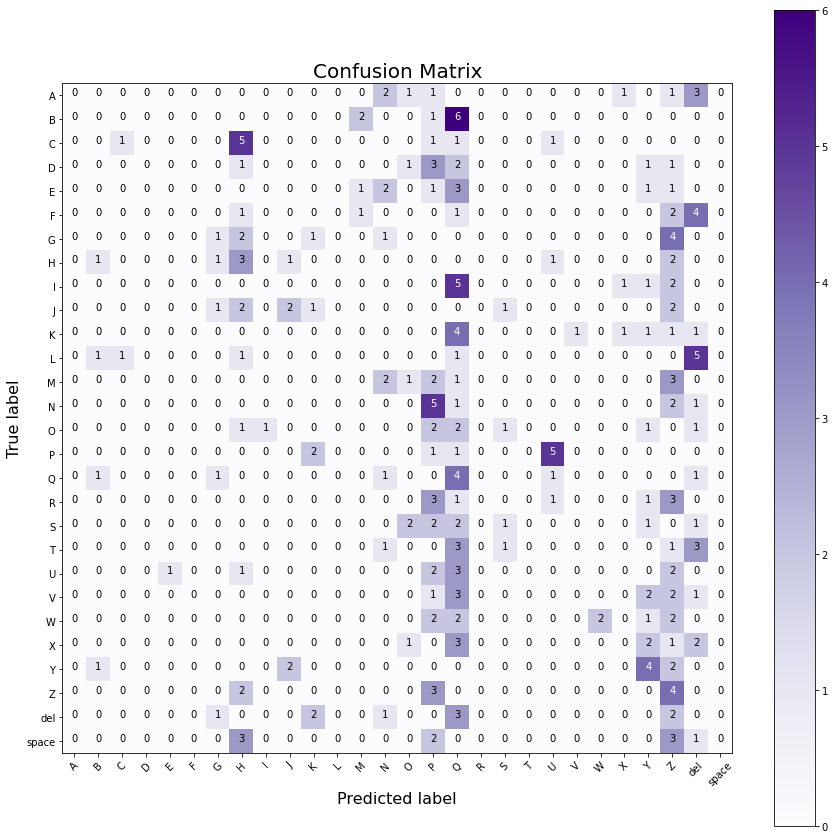

In [ ]:
y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

788/788 [==============================] - 29s 37ms/step - loss: 0.2068 - accuracy: 0.8909
Test accuracy: 0.8909119963645935
Test loss: 0.2068277895450592


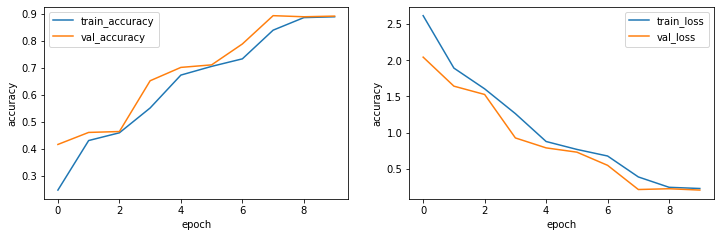

In [ ]:
results(model,history, X_eval, y_eval)


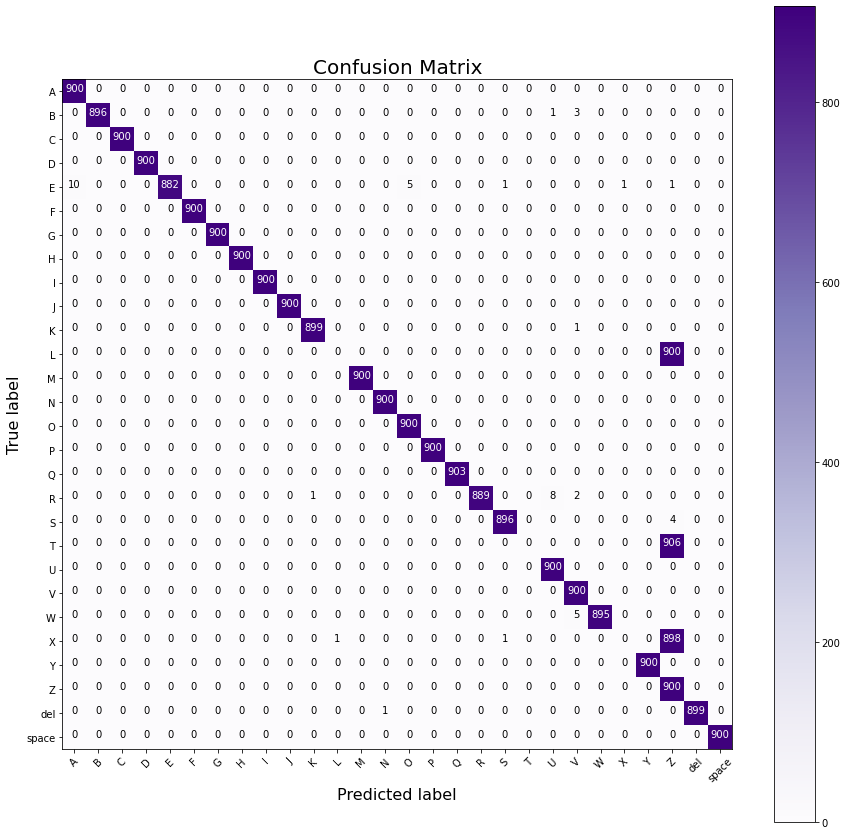

In [ ]:
y_eval_pred = model.predict(X_eval, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)